# Data Storytelling Mini Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

This project uses a chess game dataset that can be found here:
https://www.kaggle.com/datasnaek/chess

This analysis is focused on EDA, to explore the question of what characteristics are common to a winning chess player?

The theoretical client is a chess gaming app that wants to identify players who may be "smurfing". Our goal is to identify the tendencies of advanced players, so that those players may be identified, even if they are currently at a lower overall rating.

In [2]:
df = pd.read_csv("chess.csv.zip")
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [3]:
# for simplicity's sake, let's drop some columns, and include only rated games (~82% of the original dataset)
df = df[df['rated']==True]
df = df.drop(columns=["id","rated","created_at","last_move_at","increment_code","opening_eco","opening_ply","moves"])

In [4]:
df['avg_rating'] = (df['white_rating']+df['black_rating'])/2

In [5]:
def binner(x):
    if 0 < x <= 1406:
        return '0-25%'
    elif 1406 < x <= 1574:
        return '25-50%'
    elif 1574 < x <= 1776:
        return '50-75%'
    else:
        return 'Top 25%'

df['avg_bin'] = df['avg_rating'].apply(binner)

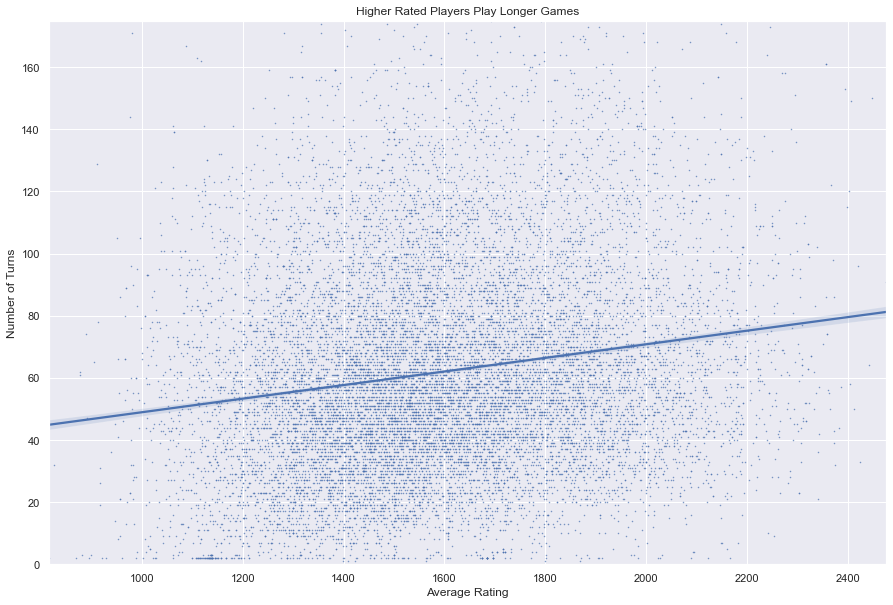

In [6]:
_ = plt.figure(figsize=(15,10))
_ = plt.ylim(0,175)
_ = plt.title("Higher Rated Players Play Longer Games")
_ = sns.regplot(x='avg_rating',y='turns',data=df,fit_reg=True,marker='.',scatter_kws={'s':1})
_ = plt.xlabel("Average Rating")
_ = plt.ylabel("Number of Turns")
_ = plt.savefig("longer_games.png")

In [7]:
df.victory_status.unique()

array(['resign', 'mate', 'draw', 'outoftime'], dtype=object)

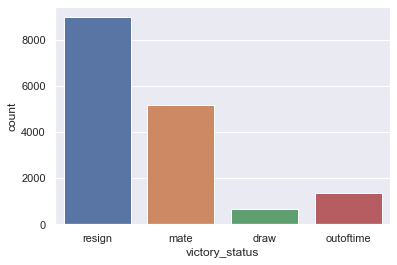

In [8]:
_ = sns.countplot(x="victory_status", data=df)

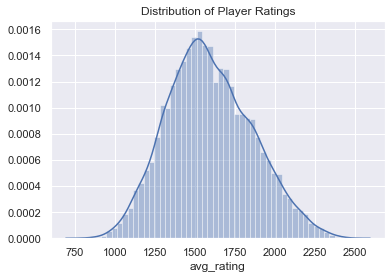

In [9]:
_ = sns.distplot(df.avg_rating)
_ = plt.title("Distribution of Player Ratings")
_ = plt.savefig("rating_dist.png")

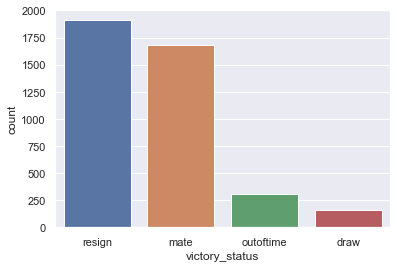

In [10]:
_ = sns.countplot(x="victory_status", data=df[df['avg_bin']=="0-25%"])

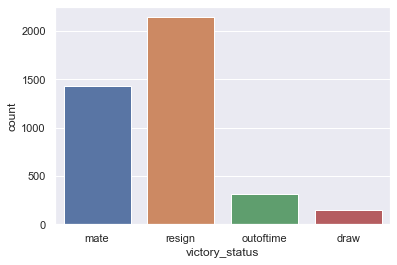

In [11]:
_ = sns.countplot(x="victory_status", data=df[df['avg_bin']=="25-50%"])

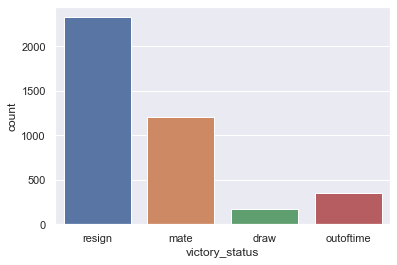

In [12]:
_ = sns.countplot(x="victory_status", data=df[df['avg_bin']=="50-75%"])

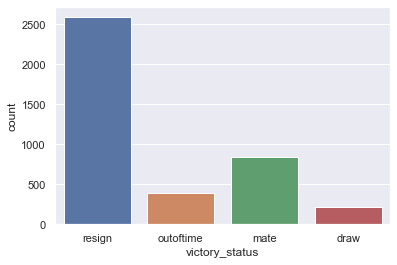

In [13]:
_ = sns.countplot(x="victory_status", data=df[df['avg_bin']=="Top 25%"])

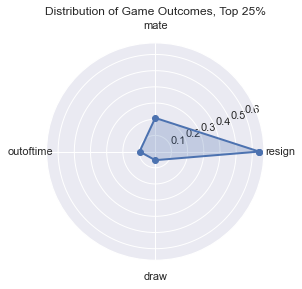

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
labels = np.array(['resign','mate','outoftime','draw'])
stats = [2588/4030,838/4030,390/4030,214/4030]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Distribution of Game Outcomes, Top 25%",y=1.1)
ax.grid(True)

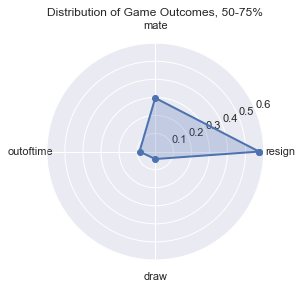

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
labels = np.array(['resign','mate','outoftime','draw'])
stats = [2327/4047,1201/4047,352/4047,167/4047]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Distribution of Game Outcomes, 50-75%",y=1.1)
ax.grid(True)

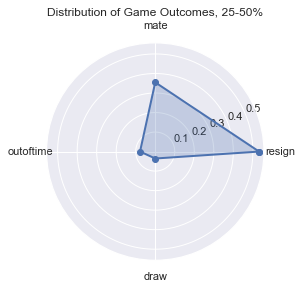

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
labels = np.array(['resign','mate','outoftime','draw'])
stats = [2144/4030,1429/4030,314/4030,143/4030]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Distribution of Game Outcomes, 25-50%",y=1.1)
ax.grid(True)

In [17]:
df[df['avg_bin']=="25-50%"]['victory_status'].value_counts()

resign       2144
mate         1429
outoftime     314
draw          143
Name: victory_status, dtype: int64

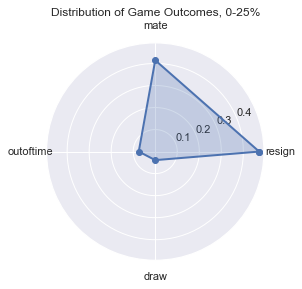

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
labels = np.array(['resign','mate','outoftime','draw'])
stats = [1910/4048,1678/4048,303/4048,157/4048]
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title("Distribution of Game Outcomes, 0-25%",y=1.1)
ax.grid(True)

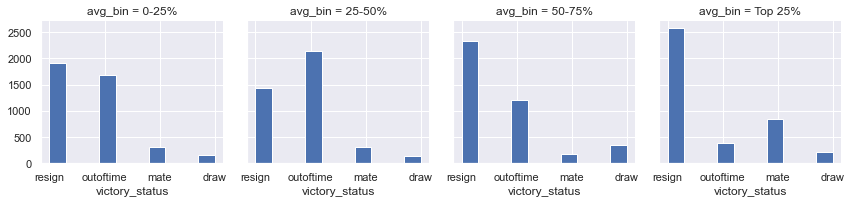

In [19]:
ax = sns.FacetGrid(df,col="avg_bin",margin_titles=True)
_ = ax.map(plt.hist, "victory_status")
_ = plt.savefig("game_outcomes.png")

In [20]:
df

turns victory_status winner       white_id  white_rating  \
1         16         resign  black           a-00          1322   
2         61           mate  white         ischia          1496   
3         61           mate  white  daniamurashov          1439   
4         95           mate  white      nik221107          1523   
6         33         resign  white        capa_jr          1520   
...      ...            ...    ...            ...           ...   
20053     24         resign  white        belcolt          1691   
20054     82           mate  black       jamboger          1233   
20055     35           mate  white       jamboger          1219   
20056    109         resign  white   marcodisogno          1360   
20057     78           mate  black       jamboger          1235   

                 black_id  black_rating  \
1               skinnerua          1261   
2                    a-00          1500   
3            adivanov2009          1454   
4            adivanov2009          1469   
6      daniel_likes_chess          1423   
...                   ...           ...   
20053            jamboger          1220   
20054  farrukhasomiddinov          1196   
20055        schaaksmurf3          1286   
20056            jamboger          1227   
20057               ffbob          1339   

                                     opening_name  avg_rating avg_bin  
1          Nimzowitsch Defense: Kennedy Variation      1291.5   0-25%  
2           King's Pawn Game: Leonardis Variation      1498.0  25-50%  
3          Queen's Pawn Game: Zukertort Variation      1446.5  25-50%  
4                                Philidor Defense      1496.0  25-50%  
6      Blackmar-Diemer Gambit: Pietrowsky Defense      1471.5  25-50%  
...                                           ...         ...     ...  
20053                               Dutch Defense      1455.5  25-50%  
20054                                Queen's Pawn      1214.5   0-25%  
20055             Queen's Pawn Game: Mason Attack      1252.5   0-25%  
20056                                Pirc Defense      1293.5   0-25%  
20057             Queen's Pawn Game: Mason Attack      1287.0   0-25%  

[16155 rows x 10 columns]

In [28]:
df[df['avg_bin']=="0-25%"].opening_name.value_counts()

Van't Kruijs Opening                                 191
Scandinavian Defense                                 112
King's Pawn Game: Wayward Queen Attack                95
Scandinavian Defense: Mieses-Kotroc Variation         74
Philidor Defense #2                                   68
                                                    ... 
Scotch Game: Alekhine Gambit                           1
Caro-Kann Defense: Panov Attack |  Modern Defense      1
King's Gambit Accepted |  Polerio Gambit               1
Rat Defense: English Rat                               1
Latvian Gambit: Mason Countergambit                    1
Name: opening_name, Length: 602, dtype: int64

In [22]:
df[df['avg_bin']=="Top 25%"]

turns victory_status winner       white_id  white_rating  \
78        47         resign  black       oldpaths          1579   
100      101         resign  white        salah04          1942   
101       75      outoftime  white        avelez8          1724   
102      135           mate  white  majid_alsalhi          1951   
112       40         resign  black           cdvh          1795   
...      ...            ...    ...            ...           ...   
20026     80         resign  black        umar527          1822   
20027     47           mate  white   alexandre789          1842   
20028    115           mate  white         lynnpv          1878   
20029     37         resign  black         lynnpv          1890   
20030     82         resign  black       gas_1948          1876   

             black_id  black_rating  \
78     iris_foxspring          2105   
100           avelez8          1739   
101      vincenzo2000          1855   
102           avelez8          1729   
112           hunecel          1760   
...               ...           ...   
20026          lynnpv          1872   
20027          lynnpv          1885   
20028      magnosouza          1720   
20029        gas_1948          1866   
20030          lynnpv          1879   

                                         opening_name  avg_rating  avg_bin  
78                   Queen's Pawn Game: London System      1842.0  Top 25%  
100                French Defense: Marshall Variation      1840.5  Top 25%  
101                                       Scotch Game      1789.5  Top 25%  
102    French Defense: Advance Variation |  Main Line      1840.0  Top 25%  
112                         Yusupov-Rubinstein System      1777.5  Top 25%  
...                                               ...         ...      ...  
20026                                Sicilian Defense      1847.0  Top 25%  
20027            Sicilian Defense: Smith-Morra Gambit      1863.5  Top 25%  
20028     English Opening: Anglo-Scandinavian Defense      1799.0  Top 25%  
20029     English Opening: Caro-Kann Defensive System      1878.0  Top 25%  
20030   Sicilian Defense: Hyperaccelerated Fianchetto      1877.5  Top 25%  

[4030 rows x 10 columns]

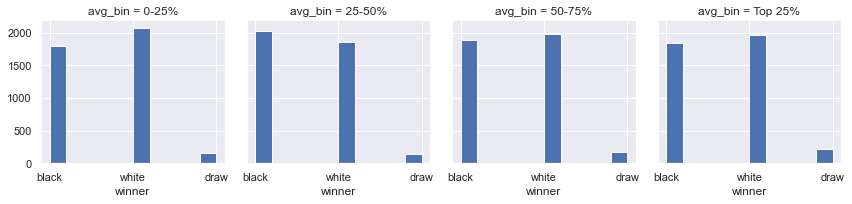

In [23]:
ax = sns.FacetGrid(df,col="avg_bin",margin_titles=True)
_ = ax.map(plt.hist, "winner")

In [24]:
df.opening_name.value_counts()

Van't Kruijs Opening                                                                  308
Sicilian Defense                                                                      283
Sicilian Defense: Bowdler Attack                                                      248
French Defense: Knight Variation                                                      229
Scotch Game                                                                           219
                                                                                     ... 
Italian Game: Classical Variation |  Greco Gambit |  Main Line                          1
Queen's Pawn Game: Veresov Attack |  Shaviliuk Gambit                                   1
Slav Defense: Soultanbeieff Variation                                                   1
Queen's Gambit Accepted: Central Variation |  Rubinstein Defense |  Yefimov Gambit      1
Sicilian Defense: Kan Variation |  Polugaevsky Variation                                1
Name: open

In [25]:
top_openings = ["Van't Kruijs Opening","Sicilian Defense","Sicilian Defense: Bowdler Attack","French Defense: Knight Variation","Scotch Game"]
open_df = df[df['opening_name'].isin(top_openings)]
copy1 = open_df.iloc[4].copy()
copy2 = open_df.iloc[5].copy()
open_df.iloc[4] = copy2
open_df.iloc[5] = copy1
open_df.head(10)

C:\Users\abewo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


turns victory_status winner        white_id  white_rating  \
32      54         resign  white     vihaandumir          1203   
58      44         resign  black           wpc96          1457   
60      37         resign  black  iskendermyucel          1207   
89      34           mate  black   hoanghieudro2          1409   
101     70           mate  black   hopefullman15          1597   
105     75      outoftime  white         avelez8          1724   
162     59         resign  white        isachess          1851   
167    107         resign  white      jadesummer          1885   
172     44         resign  black        isachess          1860   
174    105      outoftime  white            fikr          1895   

              black_id  black_rating                      opening_name  \
32   shivangithegenius          1019                  Sicilian Defense   
58             tbaruel          1294                       Scotch Game   
60            oldpaths          1579  French Defense: Knight Variation   
89            oldpaths          1548  French Defense: Knight Variation   
101            avelez8          1728  French Defense: Knight Variation   
105       vincenzo2000          1855                       Scotch Game   
162        robinhood76          1890  French Defense: Knight Variation   
167           isachess          1856                  Sicilian Defense   
172         philiveykk          1820  French Defense: Knight Variation   
174           isachess          1859                  Sicilian Defense   

     avg_rating  avg_bin  
32       1111.0    0-25%  
58       1375.5    0-25%  
60       1393.0    0-25%  
89       1478.5   25-50%  
101      1662.5   50-75%  
105      1789.5  Top 25%  
162      1870.5  Top 25%  
167      1870.5  Top 25%  
172      1840.0  Top 25%  
174      1877.0  Top 25%

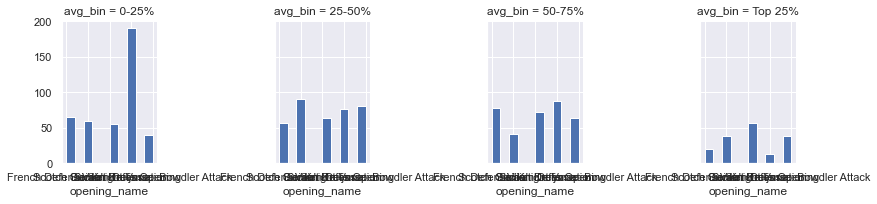

In [26]:
ax = sns.FacetGrid(open_df,col="avg_bin")
_ = ax.map(plt.hist,"opening_name")
_ = plt.savefig("popular_openings.png")

In [27]:
df.loc[df["black_id"]=="arsenelupin1620"]

turns victory_status winner       white_id  white_rating  \
1737     29           mate  white    thebastiano          1191   
1739     95      outoftime  white     tiqer35rus          1301   
1741     46           mate  black     victorioan          1383   
1742     81         resign  black  beginneresque          1498   
1743     69         resign  black      wkruger45          1355   
1745    108           mate  black       ares_zzz          1532   
1747     87      outoftime  white    davoodshadi          1728   
1751    109           mate  white      saraginov          1775   
1752     31           mate  white  sayedibraheem          1549   
1754     52           mate  black   marcuslavour          1276   
1756     26         resign  black    leeducdaica          1408   
1758    101           draw   draw      sqs198627          1814   
1761    174           mate  black  miguelnavarro          1528   
1762    123      outoftime  white       hezarfen          1651   

             black_id  black_rating  \
1737  arsenelupin1620          1598   
1739  arsenelupin1620          1616   
1741  arsenelupin1620          1606   
1742  arsenelupin1620          1597   
1743  arsenelupin1620          1592   
1745  arsenelupin1620          1583   
1747  arsenelupin1620          1576   
1751  arsenelupin1620          1558   
1752  arsenelupin1620          1570   
1754  arsenelupin1620          1573   
1756  arsenelupin1620          1579   
1758  arsenelupin1620          1568   
1761  arsenelupin1620          1564   
1762  arsenelupin1620          1573   

                                          opening_name  avg_rating avg_bin  
1737            King's Pawn Game: Wayward Queen Attack      1394.5   0-25%  
1739                               Philidor Defense #2      1458.5  25-50%  
1741                     Center Game: Normal Variation      1494.5  25-50%  
1742                                       Scotch Game      1547.5  25-50%  
1743                                       Vienna Game      1473.5  25-50%  
1745                Philidor Defense: Hanham Variation      1557.5  25-50%  
1747           Old Indian: Czech Variation |  with Nc3      1652.0  50-75%  
1751  Ruy Lopez: Morphy Defense |  Anderssen Variation      1666.5  50-75%  
1752                 King's Pawn Game: Dresden Opening      1559.5  25-50%  
1754                              Queen's Pawn Game #3      1424.5  25-50%  
1756                    King's Pawn Game: Beyer Gambit      1493.5  25-50%  
1758  King's Gambit Declined |  Queen's Knight Defense      1691.0  50-75%  
1761                     Ruy Lopez: Exchange Variation      1546.0  25-50%  
1762                             Three Knights Opening      1612.0  50-75%